In [1]:
import pandas as pd
import numpy as np

In [2]:
url = './data/'

train = pd.read_csv(url+'train.csv')

a = pd.read_csv(url+'general_dialog.csv').rename(columns={'dialogue': 'conversation'})
a['class'] = '일반 대화'
a['idx'] = range(0,len(a))
a = a[['idx','class','conversation']]

train = pd.concat([train, a], axis=0,ignore_index=True).drop(columns='idx')
train.head()

,class,conversation
0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [3]:
train.to_csv('./data/train_w_general_conv.csv')

In [4]:
train.groupby('class').count()

,conversation
class,
갈취 대화,981
기타 괴롭힘 대화,1094
일반 대화,1000
직장 내 괴롭힘 대화,979
협박 대화,896


In [5]:
extortion_data = train[train['class']=='갈취 대화']
etc_bullying_data = train[train['class']=='기타 괴롭힘 대화']
normal_convers_data = train[train['class']=='일반 대화']
work_bullying_data = train[train['class']== '직장 내 괴롭힘 대화']
threat_data = train[train['class']=='협박 대화']

extortion_data.head()

,class,conversation
3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
9,갈취 대화,자네 세금계산서 보내준 거 메일이랑 수치가 다르던데?\n그게.\n얼마나 해먹었어? ...
10,갈취 대화,네 뭐 드릴까요?\n말보르 레드 하나.\n네. 여기요!\n여기 사장은 없어?\n네 ...
13,갈취 대화,형! 형! 돈좀있어?\n저 저요.?\n여기 형말고 누가 있어? 형 얼마 있어?\n저...


In [6]:
def df2txt(data, file_name):
    with open(file_name, "w", encoding="utf-8") as f:
        for line in data["conversation"]:
            f.write(line + "\n")
    print('파일이 생성되었습니다.')

In [7]:
df2txt(extortion_data, './data/extortion_data.text')

파일이 생성되었습니다.


In [12]:
names = ['extortion_data', 'etc_bullying_data', 'normal_convers_data', 'work_bullying_data', 'threat_data']
datas = [extortion_data, etc_bullying_data, normal_convers_data, work_bullying_data, threat_data]

data_tuples = list(zip(names, datas))

for name, data in data_tuples:
    file_name = './data/wordcloud/' + name + '.txt'
    print(file_name)
    df2txt(data, file_name)


./data/wordcloud/extortion_data.txt
파일이 생성되었습니다.
./data/wordcloud/etc_bullying_data.txt
파일이 생성되었습니다.
./data/wordcloud/normal_convers_data.txt
파일이 생성되었습니다.
./data/wordcloud/work_bullying_data.txt
파일이 생성되었습니다.
./data/wordcloud/threat_data.txt
파일이 생성되었습니다.


In [14]:
from wordcloud import WordCloud

In [15]:
text = open('./data/wordcloud/normal_convers_data.txt').read()
wordcloud = WordCloud().generate(text)
wordcloud.words_

{'사람은 많았어': 1.0,
 '많았어 생각보다': 1.0,
 '좋아 그럼': 0.8688524590163934,
 '쉬는 게': 0.8005464480874317,
 '고마워 회의': 0.7841530054644809,
 '조용히 쉬는': 0.7295081967213115,
 '게 좋겠다': 0.7295081967213115,
 '될까 응': 0.7021857923497268,
 '초안 만들어둘게': 0.6994535519125683,
 '만들어둘게 검토': 0.6994535519125683,
 '검토 포인트는': 0.6994535519125683,
 '포인트는 뭘로': 0.6994535519125683,
 '뭘로 잡을까': 0.6994535519125683,
 '잡을까 가독성이랑': 0.6994535519125683,
 '가독성이랑 정확성': 0.6994535519125683,
 '정확성 위주로': 0.6994535519125683,
 '위주로 보자': 0.6994535519125683,
 '올려두면 될까': 0.6994535519125683,
 '응 히스토리': 0.6994535519125683,
 '히스토리 남는': 0.6994535519125683,
 '남는 데가': 0.6994535519125683,
 '데가 좋아': 0.6994535519125683,
 '그럼 변경': 0.6994535519125683,
 '변경 이력도': 0.6994535519125683,
 '이력도 같이': 0.6994535519125683,
 '같이 적어둘게': 0.6994535519125683,
 '적어둘게 고마워': 0.6994535519125683,
 '회의 때': 0.6994535519125683,
 '때 참고하자': 0.6994535519125683,
 '참고하자 알겠어': 0.6994535519125683,
 '알겠어 조용히': 0.6994535519125683,
 '좋겠다 그럼': 0.6994535519125683,
 '그럼 내일': 0.6994535519125

In [21]:
# Python 환경 변수 설정
import os
import matplotlib.pyplot as plt

# Java 경로 환경변수 설정 (konlpy용)
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["PATH"] += os.pathsep + os.path.join(os.environ["JAVA_HOME"], "bin")

# 폰트 설정
plt.rc('font', family='NanumGothic')

In [22]:
# -*- coding: utf-8 -*-
# 워드클라우드 기본 설치:
# pip install wordcloud matplotlib

from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pathlib import Path

# 1️⃣ 텍스트 파일 불러오기
text_path = Path("./data/wordcloud/normal_convers_data.txt")
text = text_path.read_text(encoding="utf-8", errors="ignore")

# 2️⃣ 형태소 분석 (명사 추출)
okt = Okt()
nouns = okt.nouns(text)

# 불용어(예시): 자주 등장하지만 의미가 약한 단어들
# stopwords = {
#     "그리고", "그러면", "그러니까", "하지만", "이것", "저것", "그것",
#     "그냥", "오늘", "정말", "진짜", "조금", "아니", "그게", "하면",
#     "하여", "해서", "했던", "했다", "하는", "하여서", "하기", "하다",
#     "너무", "매우", "많이", "같은", "있는", "없는", "에서", "으로",
#     "에게", "까지", "부터", "에서", "처럼", "거나", "라도", "라도요",
# }
# 
# tokens = [t for t in tokens if t not in stopwords and len(t) >= 2]

print('완료')

완료


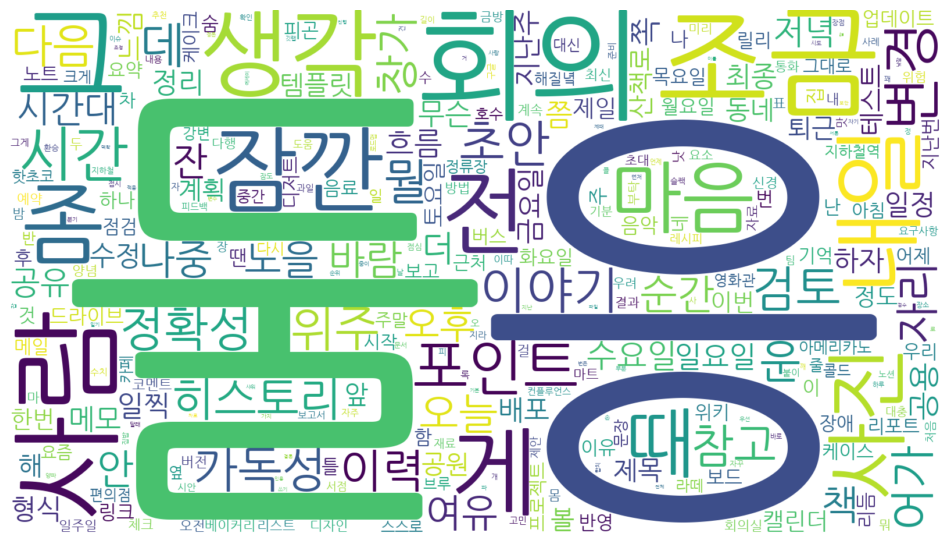

In [29]:
# 4️⃣ 빈도 계산
freqs = Counter(nouns)

# 5️⃣ 폰트 경로 (Windows 기준)
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 6️⃣ 워드클라우드 생성
wc = WordCloud(
    font_path=font_path,
    width=1600,
    height=900,
    background_color="white",
    max_words=300,
    collocations=False
).generate_from_frequencies(freqs)

# 7️⃣ 시각화
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [25]:
import pandas as pd
from pandas import DataFrame
from matplotlib import font_manager

In [26]:
flist = font_manager.findSystemFonts()
flist

['/usr/share/texmf/fonts/opentype/public/lm/lmroman8-bold.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmmono9-regular.otf',
 '/usr/share/fonts/opentype/urw-base35/NimbusMonoPS-Bold.otf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-BoldOblique.ttf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmsans8-regular.otf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/opentype/urw-base35/NimbusSansNarrow-Bold.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmroman6-regular.otf',
 '/usr/share/fonts/opentype/urw-base35/URWBookman-Light.otf',
 '/usr/share/fonts/opentype/urw-base35/C059-Italic.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmmonoslant10-regular.otf',
 '/usr/share/fonts/opentype/urw-base35/NimbusSans-Italic.otf',
 '/usr/share/fonts/opentype/urw-base35/NimbusSans-BoldItalic.otf',
 '/usr/share/fonts/opentype/urw-base35/P052-Roman.otf',
 '/usr/share/fonts/truetype/dejavu/D